# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/charliecurtin1/eds220-hwk-3

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.

The spills dataset, provided by the New York State Department of Environmental Conservation, contains information about spills of petroleum and other hazardous materials in the state of New York, including material type, quantity spilled, and location of each spill. 
- Accessed 6 Nov. 2023
- URL: https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk

The TIGER shapefiles, provided by the United States Census Bureau, display polygon features for different U.S. Census administrative boundaries, from census tracts to states. The data we are using show polygons at the county level.
- Accessed 6 Nov. 2023
- URL: https://www.census.gov/cgi-bin/geo/shapefiles/index.php

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

Text(0.05, 0.2, '* one spill occurred in the Tuscarora Indian Reservation \nwithin Niagara County')

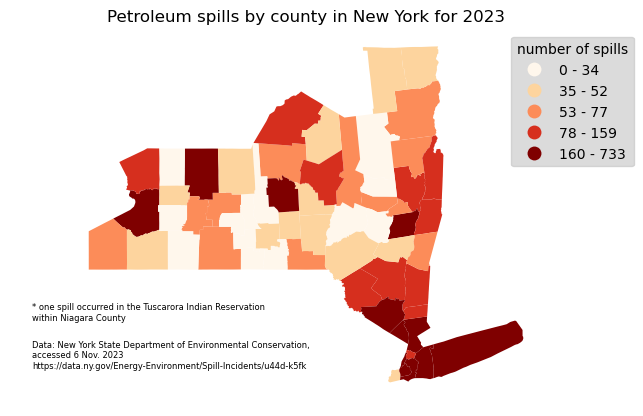

In [3]:
### ===== FINAL CODE =====

# import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# read in the spills data and the counties shapefile
spills = pd.read_csv('data/Spill_Incidents_20231106.csv')

counties = gpd.read_file('data/tl_2022_us_county/tl_2022_us_county.shp')

# simplify the column names
spills.columns = spills.columns.str.lower().str.replace(' ', '_')

counties.columns = counties.columns.str.lower()

# change spill date column to be a datetime object
spills['spill_date'] = pd.to_datetime(spills['spill_date'])

# select petroleum spills that took place between January 2023 and October 2023
petr_23 = spills[(spills.material_family == 'Petroleum') & (spills.spill_date >= '01/01/2023') & (spills.spill_date <= '10/31/2023')]

# find the number of spills per county
spills_per_county = petr_23.groupby("county").size().reset_index(name = 'n_spills')

# select counties for the state of New York
ny_counties = counties[counties.statefp == '36']

# update the name of St Lawrence to match with the name in ny_counties
spills_per_county.at[70, 'county'] = 'St. Lawrence'

# rename the 'name' to 'county' in the ny_counties dataframe to have a common column to join on
ny_counties = ny_counties.rename(columns = {'name':'county'})

# merge the two dataframes
ny_counties = pd.merge(ny_counties,
              spills_per_county,
              how = 'inner',
              on = 'county')

# add the one spill from the Tuscarora Reservation to Niagara County's count
ny_counties.at[31, 'n_spills'] = ny_counties.n_spills[31] + 1


# create a chloropleth map of the number of petroleum spills per county
fig, ax = plt.subplots()

ny_counties.plot(ax = ax,
                column = 'n_spills',
                cmap = "OrRd",
                legend = True,
                scheme = 'quantiles',
                legend_kwds={'labels': ['0 - 34', '35 - 52', '53 - 77', '78 - 159', '160 - 733'],
                            'title': 'number of spills',
                            'bbox_to_anchor': (1.2, 1),
                            'facecolor': 'lightgray'})

# turn the axes labels off
ax.axis('off')

# add a title to the plot
ax.set_title('Petroleum spills by county in New York for 2023')

# add annotations 
ax.annotate("Data: New York State Department of Environmental Conservation, \naccessed 6 Nov. 2023 \nhttps://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk",
           xy = (0.05, 0.1),
           xycoords = 'figure fraction',
           fontsize = 6)
ax.annotate("* one spill occurred in the Tuscarora Indian Reservation \nwithin Niagara County",
           xy = (.05, .2),
           xycoords = 'figure fraction',
           fontsize = 6)

<!-- write your description in this markdwon cell -->

## Import libraries

In [ ]:
# import libraries here
# import numpy too
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [ ]:
# read in the spills data and the counties shapefile
spills = pd.read_csv('data/Spill_Incidents_20231106.csv')

counties = gpd.read_file('data/tl_2022_us_county/tl_2022_us_county.shp')

## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [ ]:
# view the head of the spills data
spills.head()

In [ ]:
# simplify the column names
spills.columns = spills.columns.str.lower().str.replace(' ', '_')

spills.columns

In [ ]:
# view the data types of each column
spills.dtypes

In [ ]:
# check unique values in the material_family column
spills.material_family.unique()

In [ ]:
# check unique values in the county column
spills.county.unique()

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [ ]:
# change spill date column to be a datetime object
spills['spill_date'] = pd.to_datetime(spills['spill_date'])

spills.dtypes

In [ ]:
# select petroleum spills that took place between January 2023 and October 2023
petr_23 = spills[(spills.material_family == 'Petroleum') & (spills.spill_date >= '01/01/2023') & (spills.spill_date <= '10/31/2023')]

petr_23.head()

2. Verify that `petr_23` only has data for petroleum spills 

In [ ]:
# verify that petr_23 only has data for petroleum spills
petr_23.material_family.unique()

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [ ]:
# verify that petr_23 only has data for 2023
petr_23.spill_date.dt.year.unique()

4. Verify that `petr_23` only has data from January to October. 

In [ ]:
# verify that petr_23 only has data from January to October
petr_23.spill_date.dt.month.unique()

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [ ]:
# find the number of spills per county
spills_per_county = petr_23.groupby("county").size().reset_index(name = 'n_spills')

# view the new dataframe
print(spills_per_county.head())

# check that we have the correct number of counts
len(petr_23) == np.sum(spills_per_county.n_spills)

## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [ ]:
# check the head of the dataframe
counties.head()

In [ ]:
# set the columns to lowercase
counties.columns = counties.columns.str.lower()

In [ ]:
# check the datatypes
counties.dtypes

In [ ]:
# check the crs
counties.crs

In [ ]:
# plot the geodataframe
counties.plot()

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

In [ ]:
# select counties for the state of New York
ny_counties1 = counties[counties.statefp == '36']

## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [ ]:
# print the names of counties in ny_counties
ny_counties1.name.unique()

In [ ]:
# print the names of counties in spills_per_county
spills_per_county.county.unique()

In [ ]:
# use setdiff1d() to find the counties in spills_per_county but not ny_counties
np.setdiff1d(spills_per_county.county, ny_counties1.name)

In [ ]:
# find the counties in ny_counties but not in spills_per_county
np.setdiff1d(ny_counties1.name, spills_per_county.county)

In [ ]:
# find the number of spills in the Tuscarora Indian Reservation
spills_per_county[spills_per_county.county == 'Tuscarora Indian Reservation'].n_spills

### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [ ]:
# find the row in spills_per_county with St Lawrence
spills_per_county[spills_per_county.county == 'St Lawrence']

In [ ]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

In [ ]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

In [ ]:
# update the name of St Lawrence
spills_per_county.at[70, 'county'] = 'St. Lawrence'

In [ ]:
# check that the update was successful
spills_per_county.at[70, 'county']

### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [ ]:
# rename the 'name' to 'county' in the ny_counties dataframe
ny_counties1 = ny_counties1.rename(columns = {'name':'county'})

In [ ]:
# merge the two dataframes
ny_counties1 = pd.merge(ny_counties1,
              spills_per_county,
              how = 'inner',
              on = 'county')

In [ ]:
# find the index of Niagara County row
ny_counties1[ny_counties1.county == 'Niagara'].index[0]

# update the value
ny_counties1.at[31, 'n_spills'] = ny_counties1.n_spills[31] + 1

## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

In [ ]:
# create a chloropleth map of the number of petroleum spills per county
fig, ax = plt.subplots()

ny_counties1.plot(ax = ax,
                column = 'n_spills',
                cmap = "OrRd",
                legend = True,
                scheme = 'quantiles',
                legend_kwds={'labels': ['0 - 34', '35 - 52', '53 - 77', '78 - 159', '160 - 733'],
                            'title': 'number of spills',
                            'bbox_to_anchor': (1.2, 1),
                            'facecolor': 'lightgray'})

# turn the axes labels off
ax.axis('off')

# add a title to the plot
ax.set_title('Petroleum spills by county in New York for 2023')

# add annotations 
ax.annotate("Data: New York State Department of Environmental Conservation, \naccessed 6 Nov. 2023 \nhttps://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk",
           xy = (0.05, 0.1),
           xycoords = 'figure fraction',
           fontsize = 6)
ax.annotate("* one spill occurred in the Tuscarora Indian Reservation \nwithin Niagara County",
           xy = (.05, .2),
           xycoords = 'figure fraction',
           fontsize = 6)

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.